# Data Preparation

In this sectiono we load in and prepare the data for our machine learning.

In [1]:
# !pip install scipy
# !pip install pandas
# !pip install scikit-learn

You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
# !conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
# # Anything above 2.10 is not supported on the GPU on Windows Native
# !pip install "tensorflow<2.11"


In [3]:
# !pip list
# !pip install -q seaborn

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.11.0
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.1.3
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.1
gast                         0.4.0
google-auth                  2.23.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.58.0
h5py                         3.9.0
idna                         3.4
importlib-metadata           6.8.0
importlib-resources          6.1.0
ipy

You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\argon\Documents\UTS\AI Capstone\AI Project\DeepNN\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import os
import scipy.io as sio
import pandas as pd
from scipy.io import loadmat
import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.set_printoptions(precision=3, suppress=True)

## Ingesting the data

The following data is from a Nasa dataset with n refferring to the iteration number of the dataset used. 

    Voltage_measured: Fuel Cell terminal voltage (Volts)
    Current_measured: Fuel Cell output current (Amps)
    Temperature_measured: Fuel Cell temperature (degree C)
    Current_load: Current measured at load (Amps)
    Voltage_load: Voltage measured at load (Volts)
    Time: Time vector for the cycle (seconds)
    Capacity: Fuel Cell capacity (Ahr) for discharge till 2.7V
    Datetime: the date and time of the start of the cycle
    Ambient_temperature: Temperature in which the fuel cell is stored (degree C)
    Cycle: Charge cycle of the fuel cell


In [13]:
n = 'B0005'
df = pd.read_csv('data_frames/' + 'NASA_cycle_dataset_' + n +'.csv',
                 parse_dates = ["datetime"]).drop(["Unnamed: 0"], axis = 1)
df

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000,NaN
1,1,24,2008-04-02 13:08:17,4.206466,0.060136,24.241571,0.057,4.250,5314.703,NaN
2,1,24,2008-04-02 13:08:17,4.206558,0.057209,24.230457,0.057,4.250,5329.485,NaN
3,1,24,2008-04-02 13:08:17,4.205512,0.050194,24.241984,0.047,4.245,5344.282,NaN
4,1,24,2008-04-02 13:08:17,4.205301,0.047004,24.226732,0.047,4.245,5359.141,NaN
...,...,...,...,...,...,...,...,...,...,...
591453,170,24,2008-05-28 11:09:42,0.236356,-0.003484,23.372048,0.000,0.003,0.000,NaN
591454,170,24,2008-05-28 11:09:42,0.003365,-0.001496,23.369434,0.000,0.003,2.547,NaN
591455,170,24,2008-05-28 11:09:42,4.985137,0.000506,23.386535,0.000,5.002,5.500,NaN
591456,170,24,2008-05-28 11:09:42,4.984720,0.000442,23.386983,-0.002,5.002,8.312,NaN


## Beginning Data engineering

In the Below cells we are attempting to fill in the missing values. A brief look at the dataset showed that each cycle potentially had a capacity for at least one of its rows. 

First we test that theory:

In [3]:
capacity_counts = pd.DataFrame(df.groupby('cycle')['capacity'].nunique())
zero_capacity_rows = capacity_counts[capacity_counts['capacity'] != 1]
# capacity_counts
zero_capacity_rows

,capacity
cycle,
169,0
170,0


In [4]:
cap_std = df['capacity'].std()
cap_mean = df['capacity'].mean()

print(f"The standard deviation of capacity is {round(cap_std, 4)}.")
print(f"The average of capacity is {round(cap_mean, 4)}.")
print(f"This makes the standard deviation {round(cap_std/cap_mean*100,2)}% of the mean")

The standard deviation of capacity is 0.1824.
The average of capacity is 1.5603.
This makes the standard deviation 11.69% of the mean


The above cell shows that there is a singular battery capacity for each cycle except for 169 and 170.
For now we shall remove those two cycles as there is a large amount of deviation.

In [5]:
df = df[df['cycle'] <  169]
caps = pd.DataFrame(df.groupby('cycle')['capacity'].max())
temp = df.merge(caps, on='cycle', how='left').ffill()
temp = temp.drop(["capacity_x"], axis = 1).rename(columns = {"capacity_y" : "capacity"})
df = temp
temp.head()

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000,1.856487
1,1,24,2008-04-02 13:08:17,4.206466,0.060136,24.241571,0.057,4.250,5314.703,1.856487
2,1,24,2008-04-02 13:08:17,4.206558,0.057209,24.230457,0.057,4.250,5329.485,1.856487
3,1,24,2008-04-02 13:08:17,4.205512,0.050194,24.241984,0.047,4.245,5344.282,1.856487
4,1,24,2008-04-02 13:08:17,4.205301,0.047004,24.226732,0.047,4.245,5359.141,1.856487


In [6]:
print(f"The number of unique vlaues for ambient_temperature is: {df['ambient_temperature'].nunique()} ")

print(f"The Maximum value for voltage_measured is: {df['voltage_measured'].max()} ")

The number of unique vlaues for ambient_temperature is: 1 
The Maximum value for voltage_measured is: 8.393141180564633 


This shows that there is a consistency of ambient temperature in this dataset. This will be a limitation in the final model. We also need to check whether this voltage (which seems high)  is an outlier or not

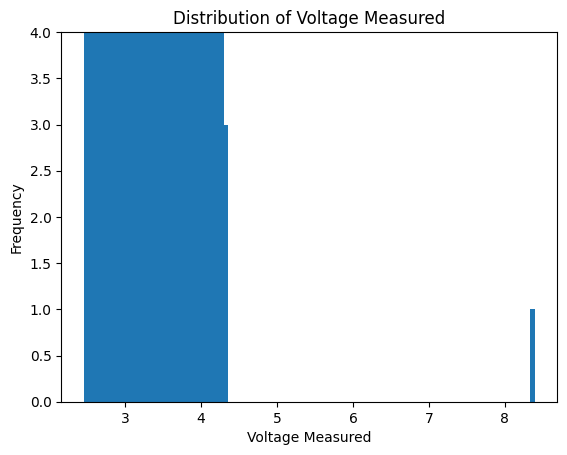

In [7]:
plt.hist(df['voltage_measured'], bins = 100)
plt.xlabel('Voltage Measured')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage Measured')
plt.ylim(0,4)
plt.show()

As shown above, there is only a singular value above 4.xxxx, making the maximum vlaue shown above a clear outlier. We need to remove this value and so shall remove it.

In [8]:
value = df['voltage_measured'].max()
df = df[df['voltage_measured'] != value]

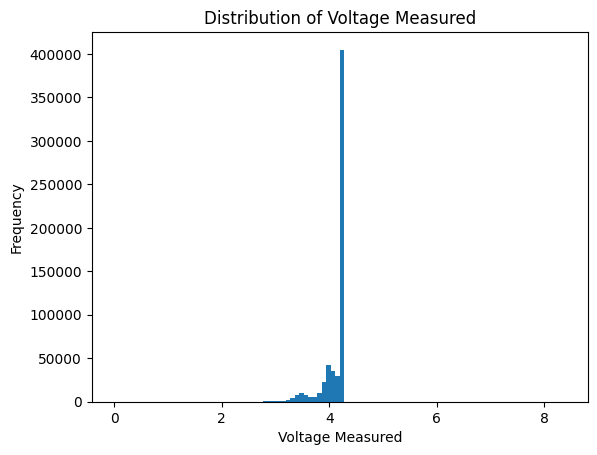

In [14]:
plt.hist(df['voltage_measured'], bins = 100)
plt.xlabel('Voltage Measured')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage Measured')
plt.show()

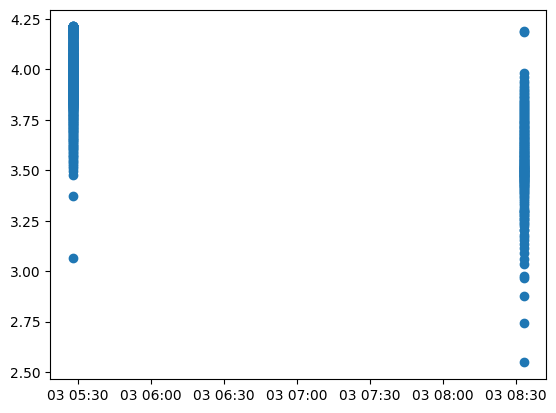

In [10]:
cycle = 5
plt.scatter(df[df['cycle'] == cycle]['datetime'], df[df['cycle'] == cycle]['voltage_measured'])

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df['SOC'] = ((df['voltage_measured'] - 2.7)/(df['voltage_measured'].max() - 2.7))

df

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity,SOC
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000,1.856487,0.726910
1,1,24,2008-04-02 13:08:17,4.206466,0.060136,24.241571,0.057,4.250,5314.703,1.856487,0.933546
2,1,24,2008-04-02 13:08:17,4.206558,0.057209,24.230457,0.057,4.250,5329.485,1.856487,0.933602
3,1,24,2008-04-02 13:08:17,4.205512,0.050194,24.241984,0.047,4.245,5344.282,1.856487,0.932955
4,1,24,2008-04-02 13:08:17,4.205301,0.047004,24.226732,0.047,4.245,5359.141,1.856487,0.932824
...,...,...,...,...,...,...,...,...,...,...,...
587844,168,24,2008-05-26 21:41:33,4.206216,0.150140,24.630151,0.146,4.294,5440.766,1.325079,0.933391
587845,168,24,2008-05-26 21:41:33,4.206092,0.149887,24.622241,0.146,4.294,5443.672,1.325079,0.933314
587846,168,24,2008-05-26 21:41:33,4.206295,0.149118,24.627536,0.146,4.294,5446.578,1.325079,0.933440
587847,168,24,2008-05-26 21:41:33,4.206364,0.148497,24.625669,0.146,4.294,5449.500,1.325079,0.933483


# Machine Learning (DNN)

Now we begin to build our Deep Neural Network

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow import keras

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
prep_df = df.drop(['datetime'], axis = 1)
train_dataset = prep_df.sample(frac=0.8, random_state = 0)
test_dataset = prep_df.drop(train_dataset.index)

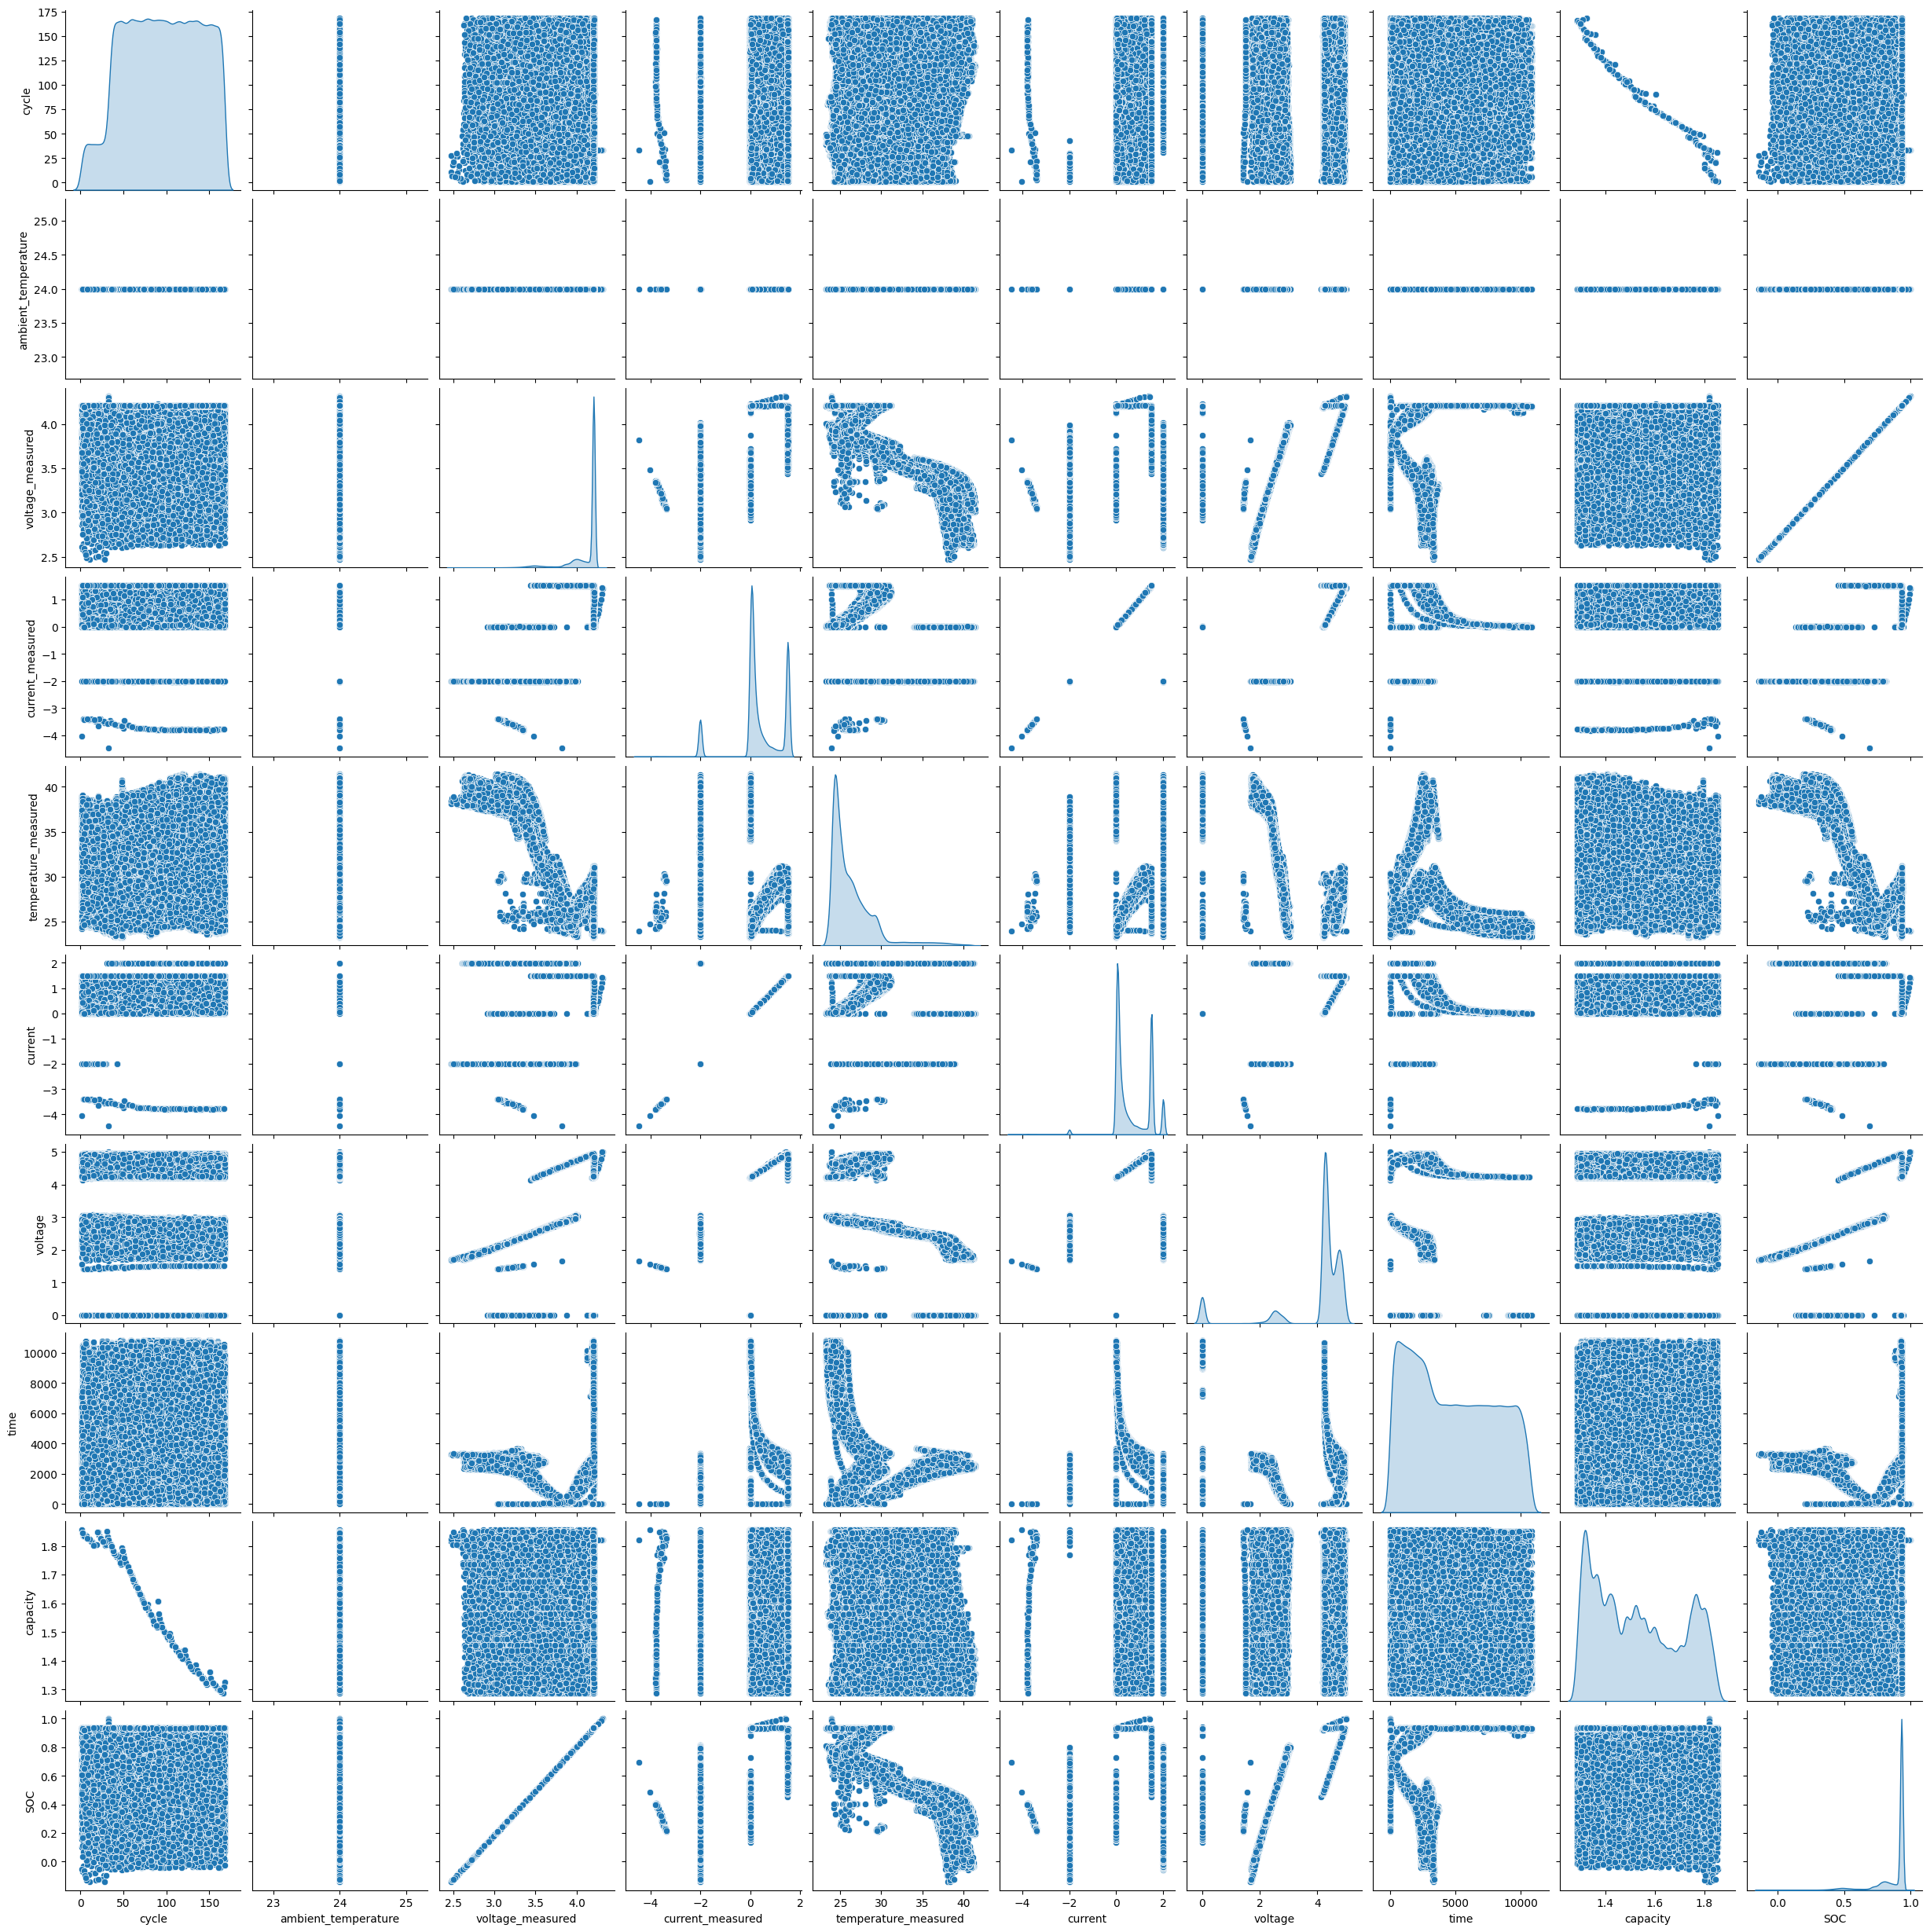

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.pairplot(train_dataset, diag_kind='kde')

In [18]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cycle,470278.0,95.409326,42.773550,1.000000,60.000000,96.000000,132.000000,168.000000
ambient_temperature,470278.0,24.000000,0.000000,24.000000,24.000000,24.000000,24.000000,24.000000
voltage_measured,470278.0,4.103417,0.213920,2.471315,4.087951,4.205138,4.205908,4.313703
current_measured,470278.0,0.368397,0.909215,-4.479660,0.039570,0.171744,1.262769,1.530376
temperature_measured,470278.0,26.375034,2.778459,23.214802,24.489700,25.483258,27.353311,41.436500
current,470278.0,0.635259,0.737868,-4.468000,0.057000,0.261000,1.498000,1.998400
voltage,470278.0,4.021590,1.212991,0.000000,4.240000,4.305000,4.656000,5.002000
time,470278.0,4764.131279,3149.310763,0.000000,1925.250000,4465.765000,7505.461250,10807.328000
capacity,470278.0,1.531791,0.171983,1.287453,1.370513,1.511898,1.694580,1.856487
SOC,470278.0,0.869687,0.132564,-0.141715,0.860103,0.932723,0.933200,1.000000


In [19]:
# These are the features
train_features = train_dataset.drop(['capacity'], axis = 1).copy()
test_features = test_dataset.drop(['capacity'], axis = 1).copy()
print(train_features.iloc[0])
# These contain the target variables
train_labels = train_features.pop('SOC')
test_labels = test_features.pop('SOC')
print('--------------------------')
print(train_features.iloc[0])

cycle                   144.000000
ambient_temperature      24.000000
voltage_measured          4.072904
current_measured          1.511057
temperature_measured     26.967343
current                   1.498000
voltage                   4.818000
time                    955.328000
SOC                       0.850779
Name: 489564, dtype: float64
--------------------------
cycle                   144.000000
ambient_temperature      24.000000
voltage_measured          4.072904
current_measured          1.511057
temperature_measured     26.967343
current                   1.498000
voltage                   4.818000
time                    955.328000
Name: 489564, dtype: float64


## Normalisation

Here we will normalise the values to give equal weight to each feature

In [20]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
cycle,95.409326,42.773550
ambient_temperature,24.000000,0.000000
voltage_measured,4.103417,0.213920
current_measured,0.368397,0.909215
temperature_measured,26.375034,2.778459
current,0.635259,0.737868
voltage,4.021590,1.212991
time,4764.131279,3149.310763
capacity,1.531791,0.171983
SOC,0.869687,0.132564


In [21]:
train_dataset.head()

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity,SOC
489564,144,24,4.072904,1.511057,26.967343,1.498,4.818,955.328,1.334007,0.850779
383689,118,24,4.201838,0.001151,24.421995,0.000,0.003,10279.687,1.412579,0.930678
580550,167,24,4.205604,0.081628,24.197675,0.080,4.261,6816.406,1.309015,0.933011
110451,51,24,4.207118,0.031110,25.934996,0.031,4.240,9218.344,1.757018,0.933950
354821,111,24,4.206939,1.083693,30.320120,1.074,4.748,2429.187,1.438671,0.933839


In [22]:
normalizer = keras.layers.Normalization(axis = 1)
normalizer.adapt(np.array(train_features))

In [23]:
train_features = normalizer(train_features)
test_features= normalizer(test_features)

## Regression with DNN

In [24]:
def build_and_compile_model():
    model=keras.Sequential([
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(1)
    ])
    
    model.compile(loss= 'mean_absolute_error',
                 optimizer = keras.optimizers.Adam(0.001),
                 metrics=['mean_squared_error', 'mean_absolute_error'])
    return model

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Error [SOC]')
    plt.title(title)
    plt.legend()
    plt.grid(True)

In [25]:
dnn_model = build_and_compile_model()
dnn_model(train_features)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (470278, 64)              576       
                                                                 
 dense_1 (Dense)             (470278, 64)              4160      
                                                                 
 dense_2 (Dense)             (470278, 1)               65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [26]:
epochs = 40
checkpoint_filepath = 'checkpoints\DNN_SOC{epoch:02d}-{val_loss:.4f}.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='mean_squared_error',
    mode='min',
    save_best_only=True)

if 'history' not in locals():
    print('New History array has been created')
    history =  []

New History array has been created


In [27]:
%%time
history.append(dnn_model.fit(
    train_features,
    train_labels,
    validation_split = 0.2,
    epochs = epochs,
    callbacks = model_checkpoint_callback))

Epoch 1/40
11757/11757 [==============================] - 53s 4ms/step - loss: 0.0067 - mean_squared_error: 7.2632e-04 - mean_absolute_error: 0.0067 - val_loss: 0.0024 - val_mean_squared_error: 1.9116e-05 - val_mean_absolute_error: 0.0024
Epoch 2/40
11757/11757 [==============================] - 51s 4ms/step - loss: 0.0026 - mean_squared_error: 1.6045e-05 - mean_absolute_error: 0.0026 - val_loss: 0.0020 - val_mean_squared_error: 1.1149e-05 - val_mean_absolute_error: 0.0020
Epoch 3/40
11757/11757 [==============================] - 51s 4ms/step - loss: 0.0019 - mean_squared_error: 8.6206e-06 - mean_absolute_error: 0.0019 - val_loss: 0.0020 - val_mean_squared_error: 6.4589e-06 - val_mean_absolute_error: 0.0020
Epoch 4/40
11757/11757 [==============================] - 50s 4ms/step - loss: 0.0015 - mean_squared_error: 5.8763e-06 - mean_absolute_error: 0.0015 - val_loss: 0.0017 - val_mean_squared_error: 5.8941e-06 - val_mean_absolute_error: 0.0017
Epoch 5/40
11757/11757 [====================

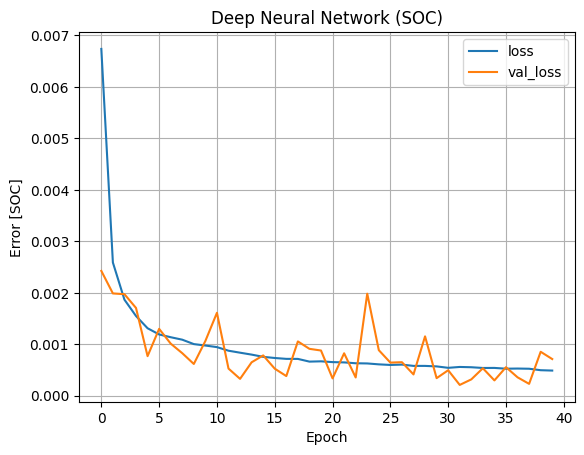

In [29]:
plot_loss(history[-1], 'Deep Neural Network (SOC)')

In [30]:
model_path = os.path.join("models","DNN_SOC_01.keras")

In [31]:
dnn_model.save(model_path)

### Performance

In [32]:
dnn_model = tf.keras.models.load_model(model_path)

In [33]:
test_predictions = dnn_model.predict(test_features).flatten()

3675/3675 [==============================] - 5s 1ms/step


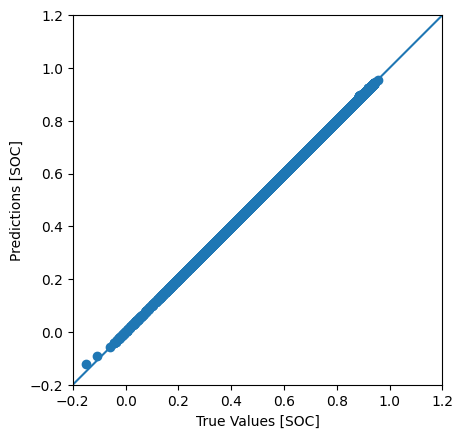

In [34]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [SOC]')
plt.ylabel('Predictions [SOC]')
lims = [-0.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

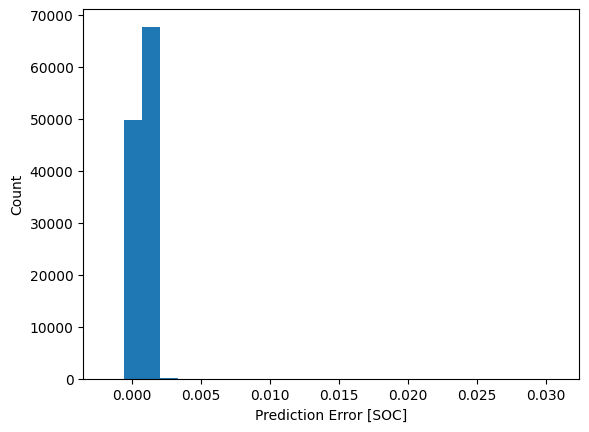

In [35]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [SOC]')
_ = plt.ylabel('Count')

In [36]:
# Calculate metrics
mse = mean_squared_error(test_labels, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_labels, test_predictions)
r2 = r2_score(test_labels, test_predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MSE: 5.833204020355925e-07
RMSE: 0.0007637541502575239
MAE: 0.0007133378390719083
R2 Score: 0.9999665750231277
